# 1. 소개

안녕하세요. 

이 튜토리얼은 Udacity의 tensorflow  강의를 기반으로 제작되었습니다. 

문의사항은 아래의 이메일로 보내주시기 바랍니다.

### 이름 : Jay

### Email : wonseokjung@hotmail.com 

### Facebook : https://www.facebook.com/ws.jung.798






이 튜토리얼에서는,  신발 셔츠와 같은 옷 이미지를 분류하는 신경망을 만들고 학습할 것입니다. 
아래의 코드를 전부 다 이해하지 않아도 괜찮습니다. 
텐서플로우 2.0을 사용해 프로젝트를 경험하기 위한 목적이니 지금은 자세하게 알지 않아도 괜찮습니다 :) 

이 가이드는 tensorflow에서 모델을 만들고 학습하기 위해 하이레벨 API 인 tf.kears를 사용하였습니다. 


# 2. 설치 및 dependencies 불러오기 
머신러닝으로 학습을 하기 위해서는 데이터가 필요합니다. 

 여기서는 Tensorflow 데이터셋이 필요합니다. 텐서플로우가 제공하는 샘플 데이터를 다운로드 받아서 사용할수 있습니다. 
 
 
 

In [1]:
!pip install -U tensorflow_datasets

    100% |████████████████████████████████| 409kB 26.8MB/s 


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals 

#텐서플로우, 데이터셋을 불러옵니다.

import tensorflow as tf
import tensorflow_datasets as tfds

tf.logging.set_verbosity(tf.logging.ERROR)

# 필요한 라이브러리를 불러옵니다. 
import math
import numpy as np
import matplotlib.pyplot as plt

# 프로그레스 바 display를 개선합니다. 
import tqdm
import tqdm.auto

tqdm.tdqm= tqdm.auto.tqdm

tqdm.tqdm = tqdm.auto.tqdm 

tf.enable_eager_execution() 



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



# 3. Fasion MNIST 데이터 불러오기 

이 가이드는 10개의 카테고리가 있는 70,000장의 grayscale 이미지의 Fashin MNIST 데이터셋을 불러오도록 하겠습니다. 

아래의 이미지와 같이 low resolution( 28 x 28 pixel) 입니다. 

  <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">

In [3]:
dataset,metadata = tfds.load('fashion_mnist', as_supervised=True, with_info = True)

train_dataset, test_dataset = dataset['train'],dataset['test']

train_dataset과 test_dataset으로 구분을 하였는데요. 

*   train_dataset을 사용하여 model을 학습시킵니다. 
*   test_dataset을 사용하여 model이 잘 학습되었는지 테스트 합니다. 

이렇게 하는 이유는 학습할떄 사용되지 않은 이미지를 사용해서 test하기 위해 구분하는 것 입니다. 

이 28x28 array의 이미지는 [0, 255]  범위의 pixel value를 갖고 있습니다. 

이미지의 class마다 label을 갖고 있으며 10개의 카테고리로 범위는 [0,9] 입니다. 

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>


각 이미지들은 특정 label에 맵핑 되어있습니다. 데이터셋에 클래스의 이름이 지정되어 있지 않으므로, 지정해주어서 나중에 사진을 플롯할때 볼수 있도록 만들어야 합니다. 


In [0]:
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle boot']

# 4. 데이터셋 살펴보기 

패션 MNIST 데이터셋을 사용하여 모델을 학습하기 전에 이 데이터가 어떻게 구성되어있는지 알아보도록 하겠습니다 :) 

먼저 트레이닝세트는 60,000장의 이미지로 구성되어 있으며,

테스트세트는 10,000장의 이미지로 구성되어 있습니다. 
<img src="https://www.dropbox.com/s/ukez7768nnkmqwd/Screenshot%202019-04-18%2014.25.07.png?raw=1">



In [5]:
num_train_examples = metadata.splits['train'].num_examples 

print("트레이닝 이미지 데이터는 {} 개 입니다.".format(num_train_examples))

트레이닝 이미지 데이터는 60000 개 입니다.


In [6]:
num_test_examples = metadata.splits['test'].num_examples
print("테스트 이미지 데이터는 {}개 입니다.".format(num_test_examples))

테스트 이미지 데이터는 10000개 입니다.


# 5 데이터 전처리하기 ! 

우리가 사용하는 이미지데이터의 픽셀값의 범위는 [0,255] 입니다.  이 픽셀값을 정규화작업을 거쳐 [0,1]의 범위로 만들어야합니다. 

그렇기하기 위해서 정규화 함수(normalization function)를 만들고, 트레이닝과 테스트 이미지에 적용해보도록 하겠습니다 ! 





In [0]:
def normalize(images, labels): 
  images = tf.cast(images, tf.float32)
  images /=255 
  return images, labels 


train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

## 5.1 전처리한 데이터 보기 

전처리를 한 뒤의 이미지가 어떻게 변했는지 plot 해서 보도록 하겠습니다 :)

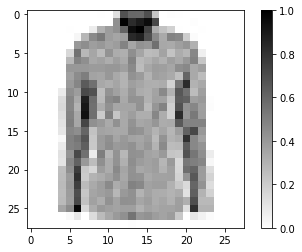

In [8]:
for image, label in test_dataset.take(1): 
  break
image= image.numpy().reshape(28,28)


#사진을 플롯해볼게요 :) 

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

테스트세트에서 25개의 이미지를 출력해보고 각 이미지의 아래에 이미지에 맞는 클래스의 이름을 넣어볼게요. 

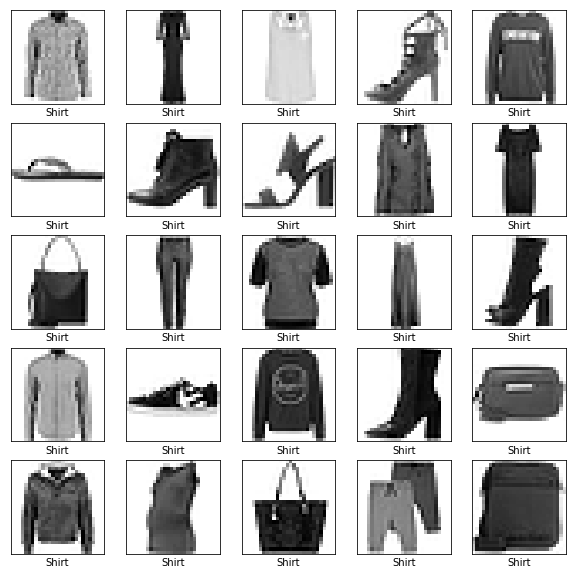

In [9]:
plt.figure(figsize=(10,10))
i=0

for (image, labels) in test_dataset.take(25):
  image=image.numpy().reshape(28,28)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

# 6. 모델 생성 

신경망 모델을 만들어보도록 하겠습니다.

## 6.1 레이어 

신경망의 기본 구조는 레이어로 이루어져 있습니다. 레이너는 데이터에서 representation  을 추출합니다. 


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)    
])

위의 신경망은 세개의 레이어로 구성되어 있습니다. : 
1. **input**:  tf.keras.layers.Flatten  : 이 레이어는 이미지를 2차원 배열 28 x 28 픽셀에서 1차원의 784 픽셀값  ( 28 * 28 ) 로 바꿉니다.
이 레이어는 학습가능한 파라미터가 없으며 데이터를 리포맷 하는 작업만 해줍니다. 
<img src="https://www.dropbox.com/s/8iuz8emfwpa2dmm/Screenshot%202019-04-18%2014.28.24.png?raw=1">

2. **hidden** : tf.keras.layers.Dense  : Dense 레이어 입니다.이 레이어는 128개의 뉴런으로 연결되어있습니다. 각 뉴런은 위에서 만들어준 레이어에서 784개의 노드를 입력으로 받습니다. 트레이닝 중에 학습되는 hidden 레이어의 파라미터에 의해 input이 웨이트닝 되어진 value가 출력되어 다음 레이어로 전달됩니다. 
<img src="https://www.dropbox.com/s/lg7vdxdws4m1kdl/Screenshot%202019-04-18%2014.28.40.png?raw=1">

3. **output** : tf.keras.layers.Dense : 10개의 노드로 이루어진 소프트맥스 레이어입니다. 각 노드는 옷의 클래스를 의미합니다. 이전의 레이어에따라 128개의 노드로부터 입력을 받고, 각 노드는 마찬가지로 파라미터에 의해 weight 되어집니다. 그리고 [0,1]의 범위의 값을 출력합니다. 

<img src="https://www.dropbox.com/s/p10c946ikzs7k1g/Screenshot%202019-04-18%2014.31.15.png?raw=1">
이 값은 사진이 각 노드의 클래스일 확률입니다. 그러므로 10개의 노드의 합은 1입니다.

<img src="https://www.dropbox.com/s/07ljl5rau2x6b0e/Screenshot%202019-04-18%2014.25.25.png?raw=1">


## 6.2 모델 컴파일하기 

모델을 학습시키기 전에 더 필요한것들이 몇개 있습니다. 모델을 컴파일 하는 것인데요. 
다음과 같은 순서로 모델을 컴파일 하는 작업을 합니다. 



1.   Loss function - 모델의 출력과 정답의 출력의 거리를 계산하는 알고리즘입니다. 즉 로스를 측정하죠
2.   Optimizer - 측정된 로스를 줄이기 위해 파라미터를 수정하는 알고리즘입니다. 
3.   Metrics - 학습과 테스트를 모니터 하기 위해 사용됩니다. 이미지가 맞게 분류됬는지의 정확도를 알수 있습니다.


In [0]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 6.3 모델 학습시키기 

**아래를 사용하여 학습합니다.**

1. dataset.repeat()를 사용하여 반복하는 작업을 합니다. ( 이 파라미터는 학습을 얼마나 할건지 epochs parameter에서 제한합니다. )
2. dataset.shuffle(60000) : 순서를 임의로 바꿔주어 모델이 예제의 순서를 배우지 않게 만듭니다. 
3. dataset.batch(32) : model.fit이 32개의 이미지와 레이블(정답)을  사용합니다. 

**model.fit 을 사용할때 학습이 됩니다. **

1. train_dataset을 사용하여 모델에 학습 데이터를 줍니다.
2. 모델이 이미지와 정답간의 연결을 학습합니다. 
3. 파라미터 epochs=5 의 의미는 60000장의 이미지를 5번 학습한다는 의미입니다. 총 5 * 60000 = 300000번 학습한다는 의미이지요.  

In [0]:
BATCH_SIZE = 32 
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


In [15]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4939 - acc: 0.8264
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3716 - acc: 0.8658
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3330 - acc: 0.8789
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3128 - acc: 0.8859
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2900 - acc: 0.8946


## 6.4 정확도 평가하기 !

다음으로 우리가 학습한 모델로 테스트 데이터에서 옷을 얼마나 구분할수 있는지 테스트해보겠습니다. 


In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('테스트 데이터셋의 정확도는 : ',test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.3642 - acc: 0.8694
테스트 데이터셋의 정확도는 :  0.8694


# 7. 예측하기

우리가 학습시킨 모델을 사용하여 사진의 옷이 어떤 종류인지 예측해볼게요! 

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

 test_dataset.take(1)에서 뽑은 테스트데이터의 이미지를 학습시킨 모델을 사용하여 정답이 무엇인지 예측해보았습니다. 
 

In [30]:
predictions[0]

array([5.7710899e-06, 1.1060106e-06, 6.6878339e-03, 5.7762911e-05,
       9.0463780e-02, 2.3517376e-05, 9.0272117e-01, 1.1943792e-08,
       3.9044513e-05, 9.4758210e-09], dtype=float32)

예측값의 출력은 10개 숫자의 array 입니다. 이 10 개의 숫자는 각 다른 옷의 종류를 의미하며, 모델의 출력중 가장 높은 값을 찾으려면 np.aragmax 함수를 사용합니다. 

In [31]:
np.argmax(predictions[0])

6

가장 높은 값을 가진 출력이 6번이라고 합니다.


<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

위에서 패션 MNIST 데이터의 클래스를 구분할때 6번이 셔츠라고 하였는데요. 
우리 학습시킨 모델을 사용하여 예측을 해본결과, 우리가 임의로 정한 이미지가 셔츠라고 합니다. 

맞는지 확인해보겠습니다. 




In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

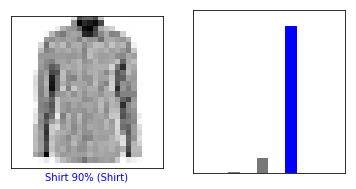

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

파란색라인은 학습시키 모델이 정답을 잘 예측한것이고, 빨간색 라인은 예측한 정답이 틀렸다는 의미입니다.

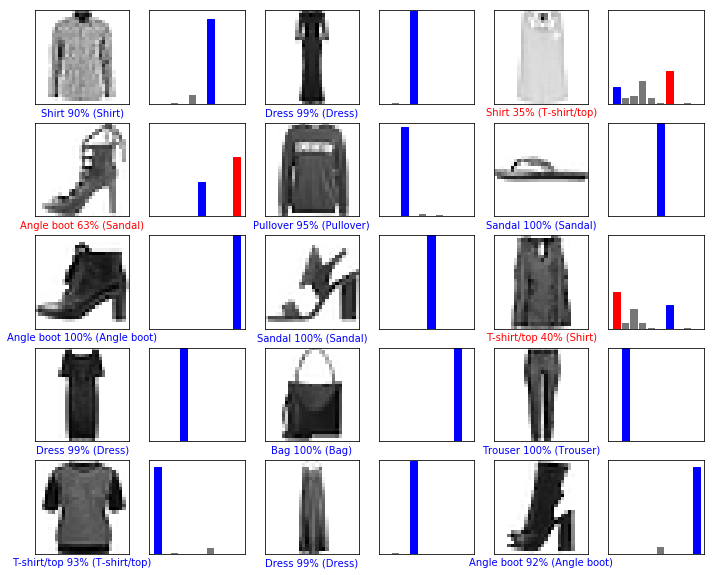

In [42]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


그렇다면 테스트이미지에서 이미지 하나를 선택하여 예측해보도록 할게요. 

In [46]:
img = test_images[0]

print(img.shape)

img = np.array([img])
print(img.shape)

(28, 28, 1)
(1, 28, 28, 1)


모델을 사용하여 예측을 합니다

In [47]:
predictions_single= model.predict(img)

print(predictions_single)

[[5.7710913e-06 1.1060087e-06 6.6878162e-03 5.7762867e-05 9.0463541e-02
  2.3517337e-05 9.0272141e-01 1.1943771e-08 3.9044487e-05 9.4758228e-09]]


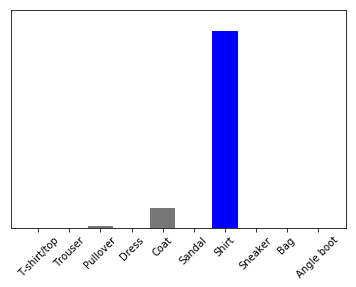

In [48]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [51]:
np.argmax(predictions_single[0])

6

모델이 6번( 셔츠라고 예측하였네요!) 

수고하셨습니다 오늘 튜토리얼은 이것으로 마치겠습니다. 

tensorflow 2.0으로 fashion mnist를 사용해 분류하는 딥러닝 모델을 만들어보았습니다. 

여러가지 방법을 사용하여 정확도를 올리는 연습을 해보세요 :) 